Must-Watch Lectures

1. [Correlation and Coveriance](https://www.youtube.com/watch?v=4EXNedimDMs)

2. First 8 lectures:
[Multiple Linear Regression](https://www.youtube.com/playlist?list=PLIeGtxpvyG-IqjoU8IiF0Yu1WtxNq_4z-)

## 1. Explanatory Data Analysis
General Insight, Data Cleaning, Scatter Plots
##  2. Validation of Model Assumptions
Correlation, Multicolinearity
##  3. Model Training and Testing
Training with *statmodels*, Training with *skilearn*, Residual Analysis(optional), Cross Validation, Linear Regression with Gradient Decent

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn # advanced visulization
import matplotlib.pyplot as plt
from itertools import permutations
from sklearn.model_selection import train_test_split # machine learning library
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm #stat-heavy library
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations

## 1. Explanatory Data Analysis
We will analyse a dataset which concerns the advertisement invesment of a company on different types of investment and the percantage increase in sales. As seen below, company utulized TV, Radio and Newspaper to advertise its products. We would like to predict the percantage sales given the others using a multiple linear regression model. Thus, our features(predictors, indipendent variables) are TV, Radio and Newspaper and our target is Sales. 

Before jumping into the model traing, it is essential to gain some understanding of the data. This step is called "Exploratory Data Analysis". This step allows us to detect some patters as well as anomolies present in the data.

In [2]:
df = pd.read_csv('datasets/AdsData.csv') # load the data
df

,TV,Radio,Newspaper,Sales
0,44.5,39.3,45.1,10.4
1,230.1,37.8,69.2,22.1
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Here are several insights from this output;

1. There are 200 rows(number of data) in this data set.
2. All variables are of float type, we have all numerical data. Handling categorical data requires carefull data preprocessing. But, we are safe in this data. 
3. "non-null" means there is no missing entry. If not, we would have to apply some methods to fill out or remove these entries. 

We should always keep in mind that we are constructing a linear model in this notebook. Thus, we assume that relationship between predictors and target can be explored via linear model. In other words, we have 
$$Y = w_0 + w_1 X_1 + w_2 X_2 + w_3X_3$$ 

where $X_1$: TV, $X_2$: Radio and $X_3$: Newspaper and $Y$: Sales. 

Assume that after the training, we found $Y = 27.3 + 98 X_1 + 12.5 X_2 + 2.5X_3$. We would interpret this results as "If the other factors are held constant, each additional TV advertisement results in 98 units increase in sales ". 

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Validation of  Model Assumptions
However, in order to use linear regression as a prediction tool, we should initially check two assumptions(there are more but we will discuss them on the fly.)
1. Independent variables must have be correlated to the target variable.
2. Independent variable should not be correlated with each other(Multicolinearity).

Let's start from the first one. 
### Correlation
In order to apply Linear Regression to our data, we have to check the correlation between each candidate predictors (TV, Radio and Newpaper) and the target variable(Sales). A variable will not be a good predictor if it doesn't significantly correlated with the target variable. Carefully note that a weak correlation does not mean there is no relationship at all, there may be some non-liner relationship but definetely not linear.

Correlation is a statistical measure on how strong a linear relationship between two variables. The values ranged between -1.0 and 1.0, where:
- Positive value = positive correlation, means one variable increases as the other variable increases, or vice versa. The closer to 1, the stronger the positive relationship.
- Negative value = negative correlation, means one variable decreases as the other variable increases, or vice versa. The closer to -1, the stronger the negative relationship.
- Zero = no correlation, means that a variable has nothing to do with the other variable.


We will use two methods to inspect the correlation. First one is to scatter plot each variable vs target variable. Another one is to display the Correlation Coefficient which which measures the linear relationship between two quantitative variables.

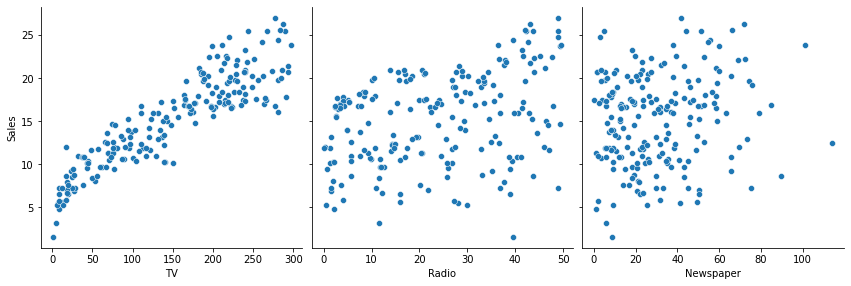

In [5]:
sn.pairplot(df, x_vars = ['TV', 'Radio','Newspaper'], 
             y_vars = 'Sales', height = 4, aspect = 1, kind = 'scatter')
plt.show()

As seen in the figures, it appears that TV has a strong correlation with Sales. Now, let's quantify this claim with corrrelation coefficent heatmap. As seen below, TV has a very strong correlation(0.9) to Sales but this is kind of weak for Newspaper(0.1)

In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


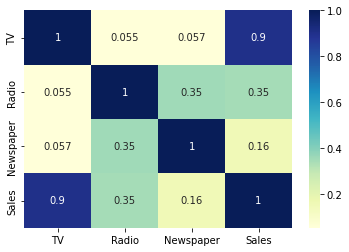

In [7]:
sn.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Multicolinearity

As for the second item, we can use the heatmap above for an inspection. Darker the color, stronger the colinear relationship. It appears that, colinearity is not an issue for this problem as we do not observe strong correlations between indepentdent variables. 

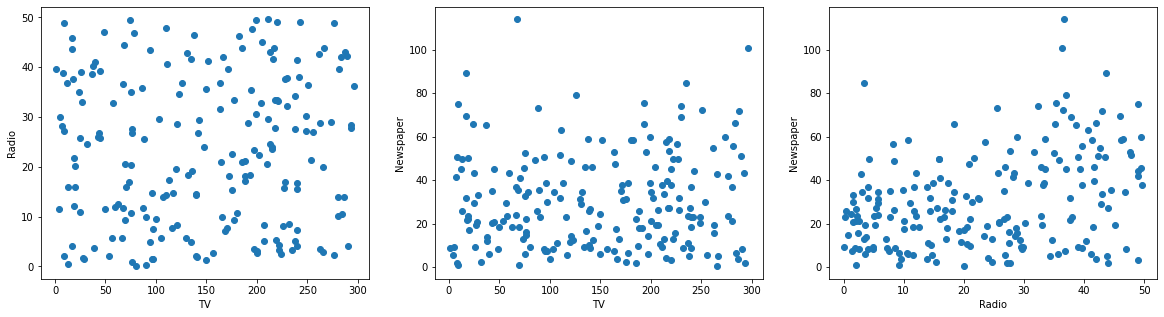

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].scatter(x = df['TV'],y = df['Radio'])
axes[0].set_xlabel('TV')
axes[0].set_ylabel('Radio')
axes[1].scatter(x = df['TV'],y = df['Newspaper'])
axes[1].set_xlabel('TV')
axes[1].set_ylabel('Newspaper')
axes[2].scatter(x = df['Radio'],y = df['Newspaper'])
axes[2].set_xlabel('Radio')
axes[2].set_ylabel('Newspaper')
plt.show()

One great way to check whether colinearity exist in the features is to calculate the variable inflation factor(VIF). Idea here is to pick one variable and create linear regression aganist others. For each regression, $R^2$ value is calculated then we define $$VIF = \dfrac{1}{1-R^2}$$
Here $R^2$ is simply the square of the correlation coefficent. Recall that $-1\leq R \leq 1$. Thus greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. Generally, a VIF above 5 indicates a high multicollinearity. As seen below, there is not a strong multicolinearity in the data.

If multicolinearity exist in the data, these features must be removed sequentially in the model. Othwerwise, it can be impossible to explain the possible causes of the changes in the data. This is like using maple syrup, sugar and honey in a cake and try to understand the source of the sweetness(: 

In [9]:
# the independent variables set
X = df.drop(['Sales'],axis = 1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

     feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


In [10]:
# sn.pairplot(df, x_vars = ['TV', 'Radio','Newspaper'], 
#              y_vars = ['TV', 'Radio','Newspaper'], height = 4, aspect = 1, kind = 'scatter')
# plt.show()



##  3. Model Training and Testing
Recall the general idea. Our problem is; for the given data points $(x_i,y_i)$, find $w_0,w_1,w_2,w_3$ to minimize 

$$ \Vert \hat{Y} - \text{Y}\Vert$$ where $\hat{Y} = w_0 + w_1 X_1 + w_2 X_2 + w_3X_3$. Here we have
- $w_1,w_2,w_3$ are called weigths and $w_0$ is the intercept.
- $\hat{Y}$ is the predicted value of target variable(dependent variable)
- $X_1, X_2,X_3$ are the predictor.
- $n$ is the number of predictors (indipendent variables). For this problem n=3

We will follow these steps;
1. Split the data into traing and testing sets.
2. Train the model
3. Test the performance with various methods

We will be using two libraries statmodels and skilearn. Former one is a statistics heavy tool which has functionalities to manipulate the models in details. skilearn is more of a machine learning tool and focuces on training and testing more.

### Training with statmodels

In [11]:
X = df.drop(['Sales'],axis = 1) # predictors
y = df.Sales.values             # target values as np.array, important!

In [12]:
display(X)

,TV,Radio,Newspaper
0,44.5,39.3,45.1
1,230.1,37.8,69.2
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
display(y)

array([10.4, 22.1, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
print("X_Train:", X_train.shape)
print("X_Test:", X_test.shape)
print("y_Train:", y_train.shape)
print("y_Test:", y_test.shape)

X_Train: (160, 3)
X_Test: (40, 3)
y_Train: (160,)
y_Test: (40,)


In [16]:
X_train

,TV,Radio,Newspaper
59,210.7,29.5,9.3
43,206.9,8.4,26.4
166,17.9,37.6,21.6
39,228.0,37.7,32.0
104,238.2,34.3,5.3
...,...,...,...
158,11.7,36.9,45.2
82,75.3,20.3,32.5
84,213.5,43.0,33.8
176,248.4,30.2,20.3


In [17]:
print(X_train.iloc[0],y_test[0])

TV           210.7
Radio         29.5
Newspaper      9.3
Name: 59, dtype: float64 10.8


Now let's have a look at stat model module which gives more detail about the model. It uses ordinary least square method.

In [18]:
model1 =  sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [19]:
model1.params

const        4.768306
TV           0.054059
Radio        0.100708
Newspaper    0.000183
dtype: float64

 $Y=4.63+0.05𝑋_1+0.1𝑋_2+0.001𝑋_3$

In [20]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     471.1
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           5.99e-78
Time:                        19:28:11   Log-Likelihood:                -306.91
No. Observations:                 160   AIC:                             621.8
Df Residuals:                     156   BIC:                             634.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7683      0.344     13.870      0.000       4.089       5.447
TV             0.0541      0.002     35.206      0.000       0.051       0.057
Radio          0.1007      0.010     10.106      0.000       0.081       0.120
Newspaper      0.0002      0.007      0.026      0.979      -0.014       0.014
==============================================================================
Omnibus:                       18.559   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.340
Skew:                          -0.586   Prob(JB):                     1.57e-07
Kurtosis:                       4.824   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For now, we will focus on three aspects of this summary:

**R-squared**: This tells us how much of the variance of the target variable is explained by the predictors in the model. R-squared value close to 1 corresponds to a good model and a value close to 0 indicates a poor model. However as a very well known property, R-squared never decreseas even if we new random predictors. 

**adjusted-R-squared** The idea in this metric is to penalize the R-squared score as we add new features. Thus, this is a better metric for the considered model.

**𝑃 >|𝑡|**  indicates the p-value. A low p-value (< 0.05) shows that the correponsing feature has significant effect on the target variable. For example, this output indicates that newspaper is an insignificant feature in the sales in this linear model. In the later stages, we may drop it in the analysis. 

In the light of this discussion, it appears that TV and Radio are the best predictors for this model. It is obvious that the Newspaper is not statistically significant predictor. We will remove and retrain the model again later.

Without any regularization or data-modification, lets first test the performance of the model on the testing data using all predictors. We will consider four important metrics; R Square, Adjusted R Square, Root Mean Square Error(MSE), Mean Absolute Percentage Error(MAPE). Here we should note a few points:

1. **MSE/MAPE** can be used to compare the quality of two models. The smaller the better. However, they dont tell how good the model is.
2. **MAPE** is less sensitive to outliers as opposed to MSE where we magnify the difference by squraring it. However MSE is a common choice for many models from analysis stanpoint since it has smoot derivatives. For example, we cant use MAPE the gradient decent method.
3. **R Squared & Adjusted R Squared** explains how well the selected features explain the variablity in the model. So a model with  Adjusted R Squared = 0.03 is definetely poor. 

In [21]:
def EvalauteModel(model, X_true, y_true, decimal = 5):
    y_pred = model.predict(sm.add_constant(X_true))
    metric = {
        "R-sq": round(model.rsquared, decimal),
        "Adj. R-sq": round(model.rsquared_adj, decimal),
        "RMSE": round(np.sqrt(metrics.mean_squared_error(y_true, y_pred)), decimal),
        "MAPE": round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, decimal)
    }
    return metric

In [22]:
EvalauteModel(model1, X_test,y_test)

{'R-sq': 0.90059, 'Adj. R-sq': 0.89868, 'RMSE': 1.65713, 'MAPE': 9.81573}

Adjusted R^2 score is 0.89 and it is very close to the training R^2 score. This indicates there is no overfitting in the model. Now, let's remove the Newspaper coloumns from the model and retrain to see if we can get a better results

In [23]:
# # Notice that we dont modify the target but just drop the 'Newspaper' feature.
#feature_to_drop = ['Newspaper']
X_train_new = X_train.drop(['Newspaper'], axis = 1)
X_test_new = X_test.drop(['Newspaper'], axis = 1)


In [24]:
X_train_new

,TV,Radio
59,210.7,29.5
43,206.9,8.4
166,17.9,37.6
39,228.0,37.7
104,238.2,34.3
...,...,...
158,11.7,36.9
82,75.3,20.3
84,213.5,43.0
176,248.4,30.2


In [25]:
model_new = sm.OLS(y_train, sm.add_constant(X_train_new)).fit()

In [26]:
EvalauteModel(model_new, X_test_new,y_test)

{'R-sq': 0.90059, 'Adj. R-sq': 0.89932, 'RMSE': 1.65714, 'MAPE': 9.82257}

We could not get a significat improvement. Let's look at the outliears in the data. If exist,we can get some progress by removing and retraining the model>

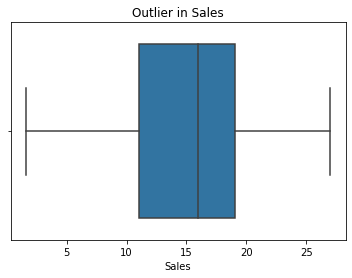

In [27]:
# # visulize the outliers in "charges". Note that same g
outlier_plot = sn.boxplot(x=df['Sales'])
outlier_plot.set_title('Outlier in Sales')
outlier_plot
plt.show()

Boxplot uses a interquartile range (IQR) method to display outliers. We substract the 75th and 25th percentiles to compute IQR, so IQR = Q3 - Q1. Then any value outside of the interval (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) is taken as an outlier. These lower and upper values are known as lower and upper whiskers as well. We can  create a simple function to iteratively remove the outliers from the data and return a data frame without outliers. 

From the figure above, it seems there is no outliears. For now, let's stop and complete the notebook with a final analysis.

In [28]:
def ReturnDataWithoutOutlier(DataFrame, target):
    DataWoOutlier = DataFrame.copy()
    while True:
        Q1 = DataWoOutlier[target].quantile(0.25)
        Q3 = DataWoOutlier[target].quantile(0.75)
        IQR = Q3 - Q1
        LWhisker = Q1 - 1.5 * IQR
        UWhisker = Q3 + 1.5 * IQR
        outlier_bool = ((DataWoOutlier[target] < LWhisker)|(DataWoOutlier[target] > UWhisker))
        outlier_counter = sum(outlier_bool)       
        if outlier_counter == 0:
            outlier_perc = (DataFrame.shape[0] - DataWoOutlier.shape[0])/DataFrame.shape[0]
            print("Outlier percantage = %",outlier_perc )
            break
        DataWoOutlier = DataWoOutlier[~outlier_bool]
    return DataWoOutlier

DataWoOutlier = ReturnDataWithoutOutlier(df, 'Sales')

Outlier percantage = % 0.0


#### Residual Analysis

In a linear model, we define the residuals as the difference between the predicted and the real values. Namely if $\hat{Y}$ and $Y$ are the predicted and real values, respectively then $$r_i=\hat{Y}_i-Y_i$$ In a linear model, it is crucial that the residuals should not form a visible pattern. Such a beheaviour may indicate that the linear regression is not a good predictive tool for this dataset. Let's plot the residuals aganist the fitted values for the first model and see if there is any pattern. As seen below, residuals do not follow a pattern.

In [29]:
y_pred = model1.predict(sm.add_constant(X_train))
res = y_pred-y_train 

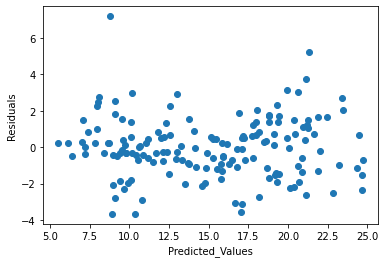

In [30]:
plt.scatter(y_pred,res)
plt.xlabel('Predicted_Values')
plt.ylabel('Residuals')
plt.show()

### Training with with Skilearn

In [31]:
import math
from sklearn import model_selection as ms
from sklearn.linear_model import LinearRegression

In [32]:
X = df.drop(['Sales'],axis = 1) # predictors
y = df.Sales.values             # target values as np.array, important!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
model3 = LinearRegression()
model3.fit(X_train,y_train)

LinearRegression()

In [34]:
print('w_0 = ', model3.intercept_)
print('w_1,w_2,w_3 = ', model3.coef_)

w_0 =  4.809928289763349
w_1,w_2,w_3 =  [0.05279157 0.11106539 0.00144354]


In [35]:
def GetScores(model, X, y):
    y_pred = model.predict(X)
    R_square = metrics.r2_score(y_pred,y)
    R_sqaure_adj = 1 - (1-R_square) * (len(y)-1)/(len(y)-X.shape[1]-1)
    MSE = metrics.mean_squared_error(y_pred,y)
    MAPE = metrics.mean_absolute_percentage_error(y_pred,y)
    decimal = 5
    metric =  {
        "R-sq": round(R_square, decimal),
        "Adj. R-sq": round(R_sqaure_adj, decimal),
        "RMSE": round(math.sqrt(MSE), decimal),
        "MAPE": round(MAPE, decimal)
    }
    return metric

In [36]:
GetScores(model3,X_train,y_train)

{'R-sq': 0.89614, 'Adj. R-sq': 0.89414, 'RMSE': 1.60064, 'MAPE': 0.0871}

In [37]:
y_train_pred = model3.predict(X_train)
r2_score_train = metrics.r2_score(y_train,y_train_pred)
y_test_pred = model3.predict(X_test)
r2_score_test = metrics.r2_score(y_test,y_test_pred)
print(' r2_score_train = ', r2_score_train)
print(' r2_score_test =  ', r2_score_test)

 r2_score_train =  0.9059116326763943
 r2_score_test =   0.882514217935684


#### Cross Validation
Here is a great tutorials explaning cross validation procedures.[here](https://www.youtube.com/watch?v=gJo0uNL-5Qw). 
Idea is very simple yet effective strategy to better asses the model performance. A model is trained using (k-1) of the folds as training data; the resulting model is validated on the remaining part of the data. The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. 

Let's first see a dummy example. Assume that our data is an array of numbers. Then we can split this data into 3 folds

In [38]:
x_dummy = np.random.randint(5,size=10)
print('SampleData: ', x_dummy)
kfold = ms.KFold(n_splits = 5)
for train_idx, test_idx in kfold.split(x_dummy):
    print(train_idx,test_idx)

SampleData:  [0 1 4 2 4 4 2 0 1 2]
[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [39]:
kfold = ms.KFold(n_splits=10)
regr = LinearRegression()
scores = ms.cross_val_score(regr, X, y,scoring = "r2", cv = kfold)
print('k-fold_scores = ',scores )
print(f'k-fold_mean_score = :{scores.mean():0.5f}')

k-fold_scores =  [0.89391193 0.84835255 0.91336339 0.93740449 0.90972209 0.92995146
 0.85494586 0.83727721 0.86267846 0.927566  ]
k-fold_mean_score = :0.89152


One important point to note is that skilearn and statmodels use "normal equations" to determine the paramters weights and the bias in multiple linear regression models. This is pretty standard topic in linear algebra(least square problems). If we rewrite the multiple linear regression model as $$y=\vec{w}\cdot\vec{x}$$ where $\vec{w} = [w_0,w_1,...,w_n]$ and $x = [X_1,X_2,...,X_n]$ then the minimization problem above can re recast as a linear equation problem as $$A_{m\times n}\cdot\vec{w}_{n\times 1} = Y_{m\times1}$$ where 
$A=
\begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_{m,1} & x_{m,2} & \cdots & x_{m,n} 
\end{pmatrix}
$
is the feature matrix and $Y = [y_1,y_2,...,y_m]$ is the target values. Note that generally $m \ge n$ since we have more observations than features. From linear algebra perspective, such problems do not have a solutions, recall the skinny matrices. However, we can introduce it as a minimization problem, namely 

Given the feature matrix $A_{m\times n}\cdot\vec{w}_{n\times 1}$ and target vector $Y_{m\times1}$ find $\vec{w}=[w_0,w_1,...,w_n]$ such that $\Vert Y- A\cdot \vec{w} \Vert_{2}$ is minimized. This problem now has a unique solution which is $$\vec{w} = (A^{T}A)^{-1}A^{T}Y$$ 

This is the method implemented in skilearn and statmodels. However, it is not feasible if the data is large. In this case, we turn our attention to Gradient Decent again. Let's see how we can implement it in skilearn

### Linear Regression with Gradient Decent

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

In [41]:
X = df.drop(['Sales'],axis = 1) # predictors
y = df.Sales.values             # target values as np.array, important!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
sgd_reg = SGDRegressor(loss = 'squared_error', max_iter=1000, learning_rate='adaptive', eta0=0.001)
sgd_reg.fit(X_train,y_train)

SGDRegressor(eta0=0.001, learning_rate='adaptive')

In [43]:
GetScores(sgd_reg, X_test,y_test)

{'R-sq': -0.12046, 'Adj. R-sq': -0.21383, 'RMSE': 267146371.49009, 'MAPE': 1.0}

In [44]:
print('w_0 = ', sgd_reg.intercept_)
print('w_1,w_2,w_3 = ', sgd_reg.coef_)

w_0 =  [6.94167229e+08]
w_1,w_2,w_3 =  [-1945795.6670027  -8451920.38496445 -3811730.41066507]


As we can clearly see, this Gradient decent diverged and failed to minimize. This is probably because Gradient decent is sentitive to large variations in the data. If we normalize the dataset, we should be able to converge to the minimizer. Skilearn provided an extentive class "preprocessing" to perform all sorts of preprocessing operations. As seen below, normalization indeed solves the problem. Our results are not as good as we obtain from normal equations as expected. However, this can be improved with a cross validation.

In [45]:
transform = preprocessing.MinMaxScaler()
data = transform.fit_transform(df)
data = pd.DataFrame(data)
X, y = data.values[:, :-1], data.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
sgd_reg = SGDRegressor(loss = 'squared_error', max_iter=10000, learning_rate='adaptive', eta0=0.1)
sgd_reg.fit(X_train,y_train)

SGDRegressor(eta0=0.1, learning_rate='adaptive', max_iter=10000)

In [47]:
print('w_0 = ', sgd_reg.intercept_)
print('w_1,w_2,w_3 = ', sgd_reg.coef_)

w_0 =  [0.12293392]
w_1,w_2,w_3 =  [0.63785927 0.19948172 0.00683696]


In [48]:
GetScores(sgd_reg, X_test,y_test)

{'R-sq': 0.89948, 'Adj. R-sq': 0.89111, 'RMSE': 0.06304, 'MAPE': 0.10351}

In [49]:
kfold = ms.KFold(n_splits = 10)
SGD = SGDRegressor(loss = 'squared_error', max_iter=10000, learning_rate='adaptive', eta0=0.1)
scores = ms.cross_val_score(SGD, X, y,scoring = "r2", cv = kfold)
print('k-fold_scores = \n',scores )
print(f'\nk-fold_mean_score = :{scores.mean():0.5f}')

k-fold_scores = 
 [0.89405753 0.84941095 0.91296619 0.93707799 0.91019874 0.92944673
 0.85499039 0.83685828 0.86237954 0.92741433]

k-fold_mean_score = :0.89148
